# 02 Dfs Algorithm

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 01, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 02 Dfs Algorithm

## 📚 Learning Objectives | أهداف التعلم

This notebook demonstrates key concepts through hands-on examples.

By completing this notebook, you will:
- Understand the core concepts
- See practical implementations
- Be ready for exercises

**Common Student Questions:**
- **Q: Why use a stack (LIFO) for DFS?**
  - Answer: Stack = Last In First Out → explores deep before wide
  - DFS goes as deep as possible before backtracking
  - Stack stores current path → when backtracking, pops last node → goes deeper
  - Example: Explores A→B→D (deep) before exploring A→C (wide)
- **Q: Why does DFS use less memory than BFS?**
  - Answer: DFS stores only current path in stack (few nodes)
  - BFS stores all nodes at current level in queue (many nodes)
  - Deep graph: DFS stores ~depth nodes, BFS stores ~width nodes
  - Example: Deep tree (depth 100, width 2) → DFS stores ~100, BFS stores ~2^100!
- **Q: Recursive vs iterative DFS - which is better?**
  - Answer: Recursive = simpler code, uses call stack (can overflow)
  - Iterative = more control, uses explicit stack (more memory control)
  - Use recursive: Simple problems, Python handles stack
  - Use iterative: Deep graphs, need to avoid stack overflow
- **Q: When should I use DFS vs BFS?**
  - Answer: DFS = any path, deep exploration, less memory, faster for deep graphs
  - BFS = shortest path, level exploration, more memory, faster for wide graphs
  - Use DFS when: Need any path, graph is deep, memory limited
  - Use BFS when: Need shortest path, graph is wide, memory available

## 🔗 Prerequisites | المتطلبات الأساسية

- ✅ Python 3.8+ installed
- ✅ Required libraries (see `requirements.txt`)
- ✅ Basic Python knowledge

---

## Code Example | مثال الكود

Run the code below to see the demonstration:


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_87346/3118013647.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


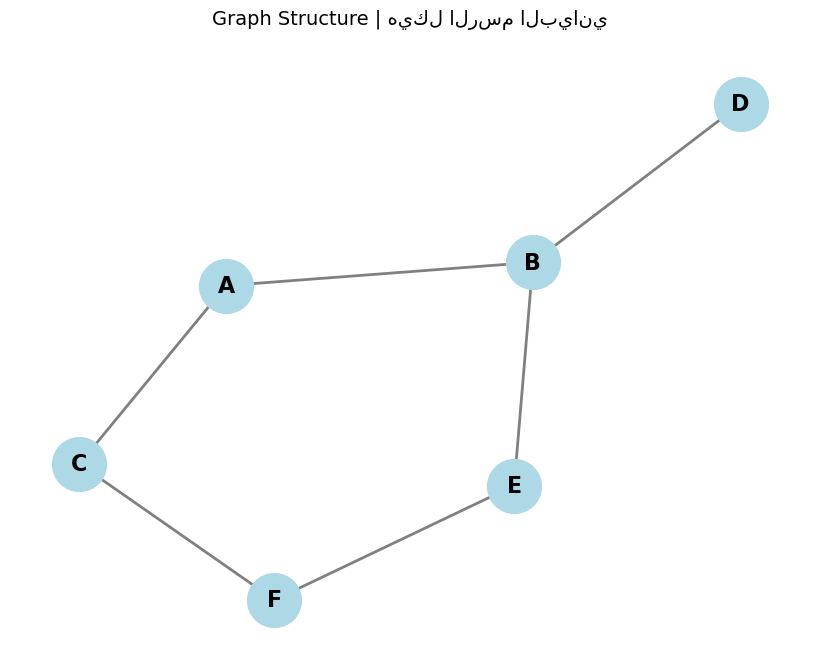

✅ Graph visualization displayed
Example 2: Depth-First Search (DFS)
مثال 2: البحث بالعمق أولاً

Testing DFS Algorithm (Iterative)
اختبار خوارزمية DFS (تكراري)

Searching for path from A to F...
البحث عن مسار من A إلى F...
  Visiting: A, Path: A
  Visiting: B, Path: A -> B
  Visiting: D, Path: A -> B -> D
  Visiting: E, Path: A -> B -> E
  Visiting: F, Path: A -> B -> E -> F

✓ Goal found! Path: A -> B -> E -> F

Result: ['A', 'B', 'E', 'F']

------------------------------------------------------------
Testing DFS Algorithm (Recursive)
اختبار خوارزمية DFS (عودي)
------------------------------------------------------------

Result: ['D', 'B', 'A', 'C']

Example completed successfully!
تم إكمال المثال بنجاح!


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_87346/3118013647.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


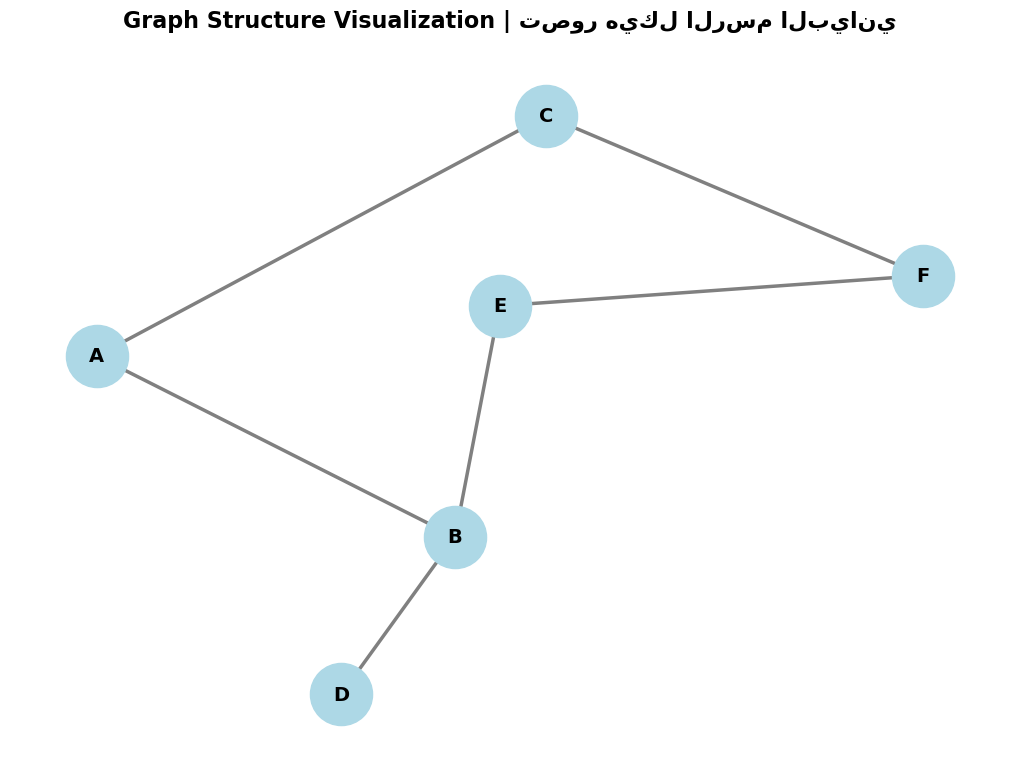


✅ Graph visualization displayed successfully!
تم عرض تصور الرسم البياني بنجاح!


In [1]:


# Visualization: Graph Structure
# تصور: هيكل الرسم البياني
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Create a simple graph visualization
    G = nx.Graph()
    G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')])
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1500, font_size=16, font_weight='bold', 
            edge_color='gray', width=2)
    plt.title('Graph Structure | هيكل الرسم البياني', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    print("✅ Graph visualization displayed")
except ImportError:
    print("Note: Install matplotlib and networkx for graph visualization")
    print("ملاحظة: قم بتثبيت matplotlib و networkx لتصور الرسم البياني")

"""
Unit 2 - Example 2: Depth-First Search (DFS)
الوحدة 2 - مثال 2: البحث بالعمق أولاً

This example demonstrates:
1. DFS algorithm implementation
2. Recursive and iterative approaches
3. Finding paths in graphs
"""

print("=" * 60)
print("Example 2: Depth-First Search (DFS)")
print("مثال 2: البحث بالعمق أولاً")
print("=" * 60)

# Graph representation
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def dfs_recursive(graph, node, goal, visited=None, path=None):
    """
    Recursive DFS implementation.
    تنفيذ DFS العودي.
    """
    if visited is None:
        visited = set()
    if path is None:
        path = []
    
    visited.add(node)
    path = path + [node]
    
    if node == goal:
        return path
    
    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            result = dfs_recursive(graph, neighbor, goal, visited, path)
            if result:
                return result
    
    return None

def dfs_iterative(graph, start, goal):
    """
    Iterative DFS implementation using stack.
    تنفيذ DFS التكراري باستخدام المكدس.
    """
    stack = [(start, [start])]
    visited = set([start])
    
    print(f"\nSearching for path from {start} to {goal}...")
    print(f"البحث عن مسار من {start} إلى {goal}...")
    
    while stack:
        current, path = stack.pop()
        
        print(f"  Visiting: {current}, Path: {' -> '.join(path)}")
        
        if current == goal:
            print(f"\n✓ Goal found! Path: {' -> '.join(path)}")
            return path
        
        # Add neighbors to stack (reverse order for consistent behavior)
        for neighbor in reversed(graph.get(current, [])):
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append((neighbor, path + [neighbor]))
    
    print(f"\n✗ No path found from {start} to {goal}")
    return None

# Test DFS
print("\n" + "=" * 60)
print("Testing DFS Algorithm (Iterative)")
print("اختبار خوارزمية DFS (تكراري)")
print("=" * 60)

path1 = dfs_iterative(graph, 'A', 'F')
print(f"\nResult: {path1}")

print("\n" + "-" * 60)
print("Testing DFS Algorithm (Recursive)")
print("اختبار خوارزمية DFS (عودي)")
print("-" * 60)

path2 = dfs_recursive(graph, 'D', 'C')
print(f"\nResult: {path2}")

print("\n" + "=" * 60)
print("Example completed successfully!")
print("تم إكمال المثال بنجاح!")
print("=" * 60)

# Visualize the graph structure (after algorithm execution)
# تصور هيكل الرسم البياني (بعد تنفيذ الخوارزمية)
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Create graph from the algorithm's graph structure
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, k=1.5, iterations=50)
    nx.draw(G, pos, with_labels=True, 
            node_color='lightblue', node_size=2000,
            font_size=14, font_weight='bold',
            edge_color='gray', width=2.5,
            arrows=False)
    plt.title('Graph Structure Visualization | تصور هيكل الرسم البياني', fontsize=16, pad=20, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("\n✅ Graph visualization displayed successfully!")
    print("تم عرض تصور الرسم البياني بنجاح!")
except ImportError:
    print("\n📦 To see graph visualization, install:")
    print("   pip install matplotlib networkx")
    print("\nملاحظة: لرؤية التصور، قم بتثبيت:")
    print("   pip install matplotlib networkx")


---

## ✅ Summary | الملخص

Great job completing this example!

**What you learned:**
- Core concepts demonstrated in the code
- Practical implementation details

**Next steps:**
- Complete the exercises in `exercises/` folder
- Review the quiz materials
- Proceed to the next example

---

**💡 Tip:** If you see errors, make sure:
- All libraries are installed: `pip install -r requirements.txt`
- You're using Python 3.8+
- Cells are executed in order
